In [1]:
#Run SetUp Script to Install Packages 
#General purpose imports here
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import sys
import os # Operation System
import seaborn as sns  # pretty plotting, including heat map
import cv2
from timeit import default_timer as timer
from datetime import timedelta
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from skimage.transform import resize, rotate, SimilarityTransform, warp
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Activation,GlobalAveragePooling2D
from keras.optimizers import Adam

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [33]:
import warnings
warnings.filterwarnings("ignore") 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Load Dataset

In [3]:
# pick 17 fruits from the image folder
fruit=['Apple Crimson Snow','Cactus Fruit','Cantaloupe 1','Cherry 1','Eggplant','Fig','Ginger Root',
      'Kiwi','Lychee','Nut Pecan','Pepper Green','Pineapple','Plum','Rambutan','Strawberry','Tomato 1','Watermelon']

In [4]:
# Find image directory 
wrk_dir_train="/Users/kevin/Desktop/fruits-360_dataset/fruits-360/Training"
wrk_dir_test="/Users/kevin/Desktop/fruits-360_dataset/fruits-360/Test"

# 2. Exploratory Data Analysis

## Invert the color of image

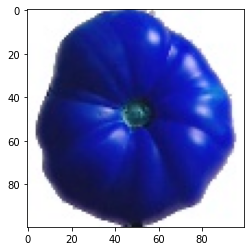

In [5]:
#Display random fruit image
img=cv2.imread(os.path.join(wrk_dir_train,'Tomato 3','r2_213_100.jpg'))
plt.imshow(img)

We notice that the color of the tomato is blue. Therefore, we need to convert the color of images.

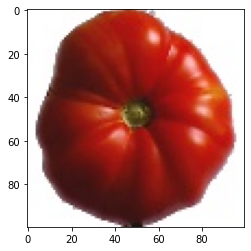

In [6]:
#Invert the color of image
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

By converting the color from BGR TO RGB format, the image is displayed in the correct color now. 

## Store images and labels in array

In [7]:
#Create array to store images and labels
image_train=[]
label_train=[]
image_test=[]
label_test=[]

In [8]:
#store for train set
for i in fruit:
    for j in os.listdir(os.path.join(wrk_dir_train,i)):
        img=cv2.imread(os.path.join(wrk_dir_train,i,j))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_train.append(img)
        label_train.append(i)

In [9]:
#store for test set
for i in fruit:
    for j in os.listdir(os.path.join(wrk_dir_test,i)):
        img=cv2.imread(os.path.join(wrk_dir_test,i,j))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_test.append(img)
        label_test.append(i)

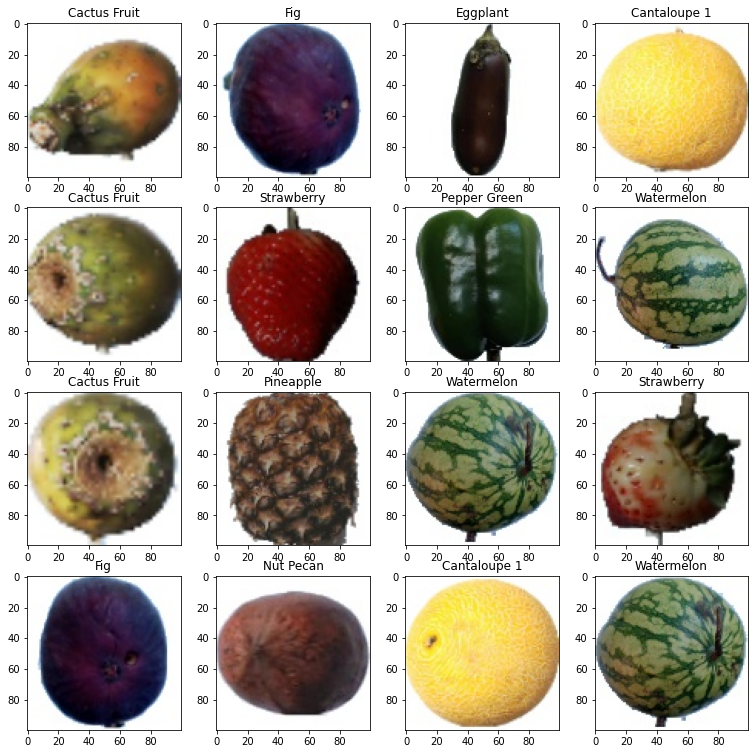

In [10]:
z=plt.figure(figsize=(13,13))
for i in range(16):
    j=np.random.choice(range(len(image_train)))
    a=plt.subplot(4,4,i+1)
    b=plt.title(label_train[j])
    c=plt.imshow(image_train[j])

## Explore train and test dataset

In [11]:
# sample size 
print('the sample size of train set is',len(image_train))
print('the sample size of test set is',len(image_test))

the sample size of train set is 8453
the sample size of test set is 2827


In [12]:
image_train[1]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
# shape of a single image
print("Train image shape: ",image_train[1].shape)
print("Test image shape: ",image_test[1].shape)

Train image shape:  (100, 100, 3)
Test image shape:  (100, 100, 3)


A single image is 100x100 pixels with three color(RGB) channel.

## Visulize the distribution of fruit labels 

In [14]:
df_train_label=pd.DataFrame(label_train,columns=['label'])

In [15]:
df_train_label.nunique()

label    17
dtype: int64

In [16]:
values = df_train_label['label'].value_counts().sort_values(ascending = True)
values 

Ginger Root           297
Pepper Green          444
Apple Crimson Snow    444
Plum                  447
Kiwi                  466
Eggplant              468
Watermelon            475
Cactus Fruit          490
Pineapple             490
Lychee                490
Rambutan              492
Strawberry            492
Cherry 1              492
Cantaloupe 1          492
Nut Pecan             534
Fig                   702
Tomato 1              738
Name: label, dtype: int64

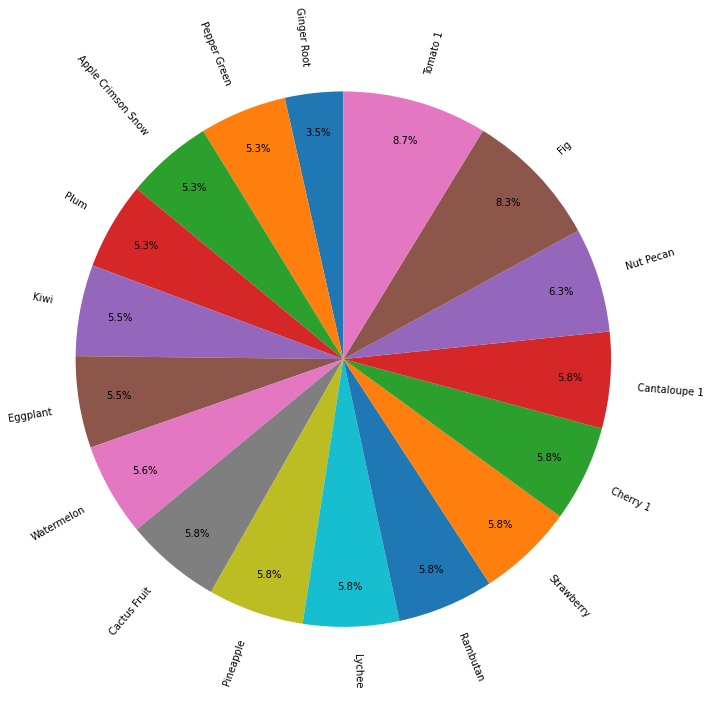

In [17]:
colors = sns.color_palette()

#create pie chart to see the distribution of label variable of interest
a=plt.pie(values, colors = colors, autopct='%1.1f%%', labels=values.index,startangle=90, pctdistance=0.85,rotatelabels=True)


fig = plt.gcf()
fig.set_size_inches(10,10)
c=plt.tight_layout()
plt.show()

According to the table and pie chart above, we can conclude that it is a balanced dataset

## Display fruit images to see different orientation

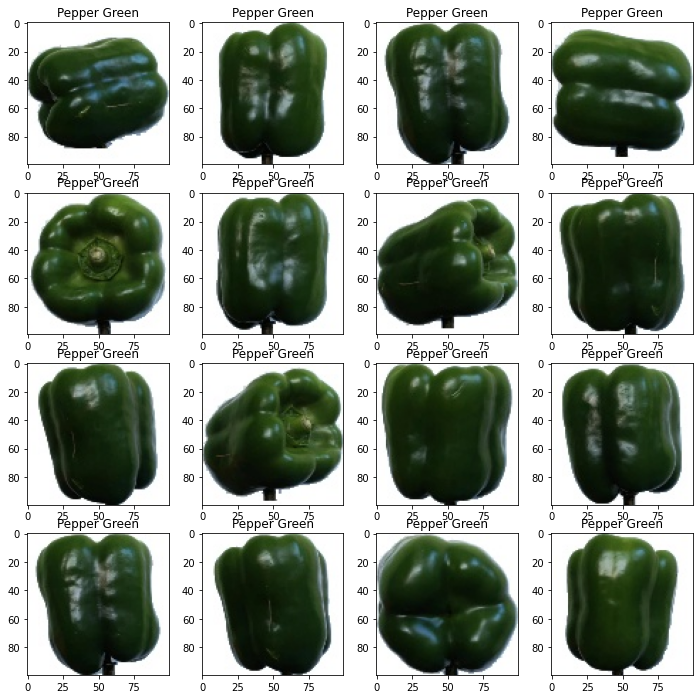

In [18]:
h=plt.figure(figsize=(12,12))
for i in range(16):
    j=np.random.choice(range(5000,5100))
    a=plt.subplot(4,4,i+1)
    b=plt.title(label_train[j])
    c=plt.imshow(image_train[j])

Notice that fruit, ex. green pepper, has different orientation, thus we need image augmentation such as zooming, horizontal and vertical flip and rotation.

# 3. Feature Engineering

## Normalize the image 

In [19]:
#convert the image list to numpy array
x_train=np.array(image_train)
x_test=np.array(image_test)
print('Train images shape: {}'.format(x_train.shape))
print('Test images shape: {}'.format(x_test.shape)) 

Train images shape: (8453, 100, 100, 3)
Test images shape: (2827, 100, 100, 3)


In [20]:
#normalize the image 
x_train=x_train/255.0
x_test=x_test/255.0

In [21]:
#image array after normalizing
x_train[1]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

## convert textual label to number

In [22]:
label_train[:10]

['Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow']

In [23]:
le = LabelEncoder()
encoded_train= le.fit_transform(label_train)
encoded_test=le.transform(label_test)

In [24]:
encoded_train

array([ 0,  0,  0, ..., 16, 16, 16])

In [25]:
print('Train label shape: {}'.format(encoded_train.shape))
print('Test label shape: {}'.format(encoded_test.shape))

Train label shape: (8453,)
Test label shape: (2827,)


## One hot encode target label to binary class

In [26]:
nb_classes = np.unique(encoded_train).size
y_train = keras.utils.to_categorical(encoded_train, nb_classes)
y_test = keras.utils.to_categorical(encoded_test, nb_classes)

In [27]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [28]:
print('Train label shape: {}'.format(y_train.shape))
print('Test label shape: {}'.format(y_test.shape))

Train label shape: (8453, 17)
Test label shape: (2827, 17)


## Train Validation split

In [29]:
# Split the train and the validation set for the fitting 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle=True, stratify=y_train, random_state = 42)
print('Train image shape: {}'.format(x_train.shape))
print('Train label shape: {}'.format(y_train.shape))
print('Val image shape: {}'.format(x_val.shape))
print('Val label shape: {}'.format(y_val.shape))

Train image shape: (6762, 100, 100, 3)
Train label shape: (6762, 17)
Val image shape: (1691, 100, 100, 3)
Val label shape: (1691, 17)


# 4. Modeling

In [30]:
# Learning curve function to visualize accuracy and loss in train and validation set.
def draw_learning_curve(history, keys=['accuracy', 'loss']):
    plt.figure(figsize=(20,8))
    for i, key in enumerate(keys):
        plt.subplot(1, 2, i + 1)
        sns.lineplot(x = history.epoch, y = history.history[key])
        sns.lineplot(x = history.epoch, y = history.history['val_' + key])
        plt.title('Learning Curve')
        plt.ylabel(key.title())
        plt.grid(True)
        #plt.gca().set_ylim(0, 1)
        plt.xlabel('Epoch')
        plt.legend(['train', 'val'], loc='best')
    plt.show()

## First model: without data augmentation

In [31]:
#define model
def generateModel1(learning_rate=0.001):
    input_layer = keras.layers.Input(shape = (100, 100, 3))
    
    filterSize = 16
    conv1 = Conv2D(filterSize, kernel_size=(3,3), padding='same')(input_layer)
    conv1 = Activation("relu")(conv1)
    conv1 = Dropout(0.25)(conv1)
    
    maxPool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    
    filterSize = 32
    conv2 = Conv2D(filterSize, kernel_size=(3,3), padding='same')(maxPool1)
    conv2 = Activation("relu")(conv2)
    conv2 = Dropout(0.25)(conv2)
    
    maxPool2 = MaxPooling2D(pool_size=(3,3))(conv2)
    
    output = Flatten()(maxPool2)
    output = Dense(512)(output)
    output = Activation("relu")(output)
    output = Dropout(0.25)(output)
    output = Dense(nb_classes, activation='softmax')(output)
    optimizer = keras.optimizers.Adam(learning_rate)
    
    model = keras.Model(inputs = input_layer, outputs = output)
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss="categorical_crossentropy")
    
    return model

In [34]:
model1=generateModel1()
print(model1.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 activation_3 (Activation)   (None, 100, 100, 16)      0         
                                                                 
 dropout_3 (Dropout)         (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        4640      
                                                           

In [35]:
epochs = 10
batch_size = 64
steps_per_epoch = x_train.shape[0]//batch_size
early_stopping_cb=keras.callbacks.EarlyStopping(monitor='loss', mode ='min', min_delta=1, patience=10)

In [36]:
start = timer()
history1 = model1.fit(x_train,y_train, validation_data=(x_val, y_val), epochs= epochs, 
                    steps_per_epoch=steps_per_epoch,callbacks=early_stopping_cb)
#final validation loss and accuracy
final_loss1, final_acc1 = model1.evaluate(x_val, y_val, verbose=1)
end = timer()
#total time taken by model1
elapsed_time1 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model1".format(final_loss1, final_acc1*100))
print("Model 1 without data augmentation training time in seconds", elapsed_time1)

Epoch 1/10
105/105 [==============================] - 36s 326ms/step - loss: 0.4475 - accuracy: 0.8709 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 2/10
105/105 [==============================] - 30s 289ms/step - loss: 0.0082 - accuracy: 0.9993 - val_loss: 0.0180 - val_accuracy: 1.0000
Epoch 3/10
105/105 [==============================] - 31s 296ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 4/10
105/105 [==============================] - 31s 295ms/step - loss: 9.3719e-04 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 5/10
105/105 [==============================] - 31s 299ms/step - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 6/10
105/105 [==============================] - 31s 298ms/step - loss: 0.0083 - accuracy: 0.9979 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/10
105/105 [==============================] - 31s 298ms/step - loss: 7.0610e-04 - accuracy: 0.9999 - val_loss: 0.0019 

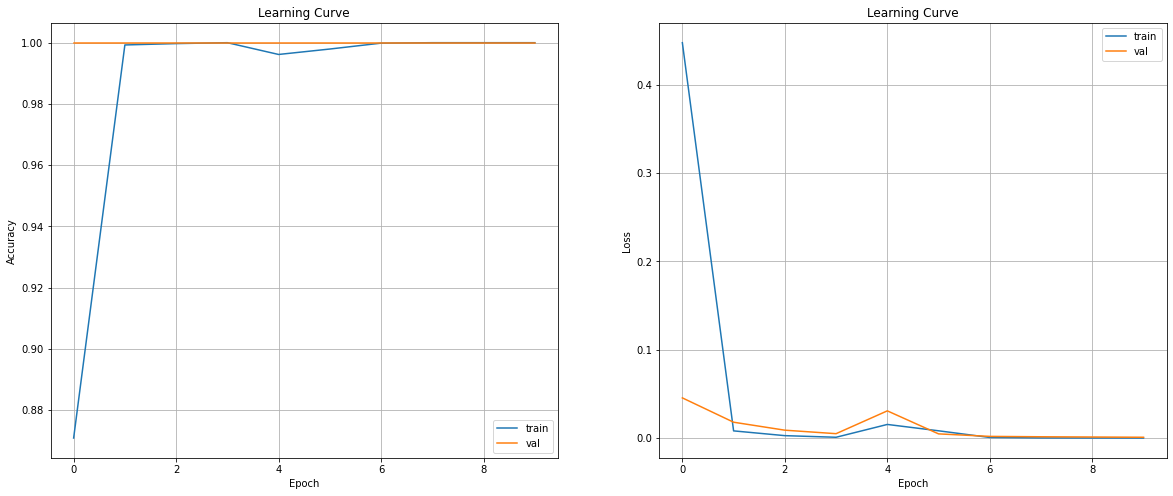

In [37]:
### Visualize learning curve
draw_learning_curve(history1)

In [38]:
#model 1 summarized results
train_loss1, train_acc1 = model1.evaluate(x_train, y_train)
Model1 = "Model 1 without data augmentation"
results = pd.DataFrame(columns = ['Model', 'Time', 'Train-loss', 'Train-accuracy', 'Test-loss', 'Test-Accuracy'])
row1 = [Model1, elapsed_time1, train_loss1, train_acc1, final_loss1, final_acc1]
results = results.append(pd.DataFrame([row1], columns=results.columns), ignore_index=True)

212/212 [==============================] - 8s 36ms/step - loss: 8.4631e-04 - accuracy: 1.0000


In [39]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,Model 1 without data augmentation,0 days 00:05:28.005410,0.000846,1.0,0.000948,1.0


## Second Model: with data augmentation

In [40]:
IDG=ImageDataGenerator(rotation_range=20,    
                       shear_range = 0.3,
                       width_shift_range=0.1,
                       height_shift_range=0.1,
                       zoom_range = 0.2,
                       horizontal_flip=True)
IDG.fit(x_train)

In [41]:
model2=generateModel1()
print(model2.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 activation_6 (Activation)   (None, 100, 100, 16)      0         
                                                                 
 dropout_6 (Dropout)         (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        4640      
                                                           

In [42]:
start = timer()
history2 = model2.fit(IDG.flow(x_train,y_train,batch_size=batch_size), validation_data=(x_val, y_val), epochs= epochs, 
                    steps_per_epoch=steps_per_epoch,callbacks=early_stopping_cb)
#final validation loss and accuracy
final_loss2, final_acc2 = model2.evaluate(x_val, y_val, verbose=1)
end = timer()
#total time taken by model1
elapsed_time2 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model2".format(final_loss2, final_acc2*100))
print("Model 2 with data augmentation training time in seconds", elapsed_time2)

Epoch 1/10
105/105 [==============================] - 36s 340ms/step - loss: 0.8452 - accuracy: 0.7438 - val_loss: 0.3695 - val_accuracy: 0.8805
Epoch 2/10
105/105 [==============================] - 36s 342ms/step - loss: 0.1079 - accuracy: 0.9697 - val_loss: 0.0601 - val_accuracy: 0.9970
Epoch 3/10
105/105 [==============================] - 36s 346ms/step - loss: 0.0337 - accuracy: 0.9909 - val_loss: 0.0395 - val_accuracy: 0.9976
Epoch 4/10
105/105 [==============================] - 37s 349ms/step - loss: 0.0376 - accuracy: 0.9888 - val_loss: 0.0702 - val_accuracy: 0.9970
Epoch 5/10
105/105 [==============================] - 37s 353ms/step - loss: 0.0247 - accuracy: 0.9933 - val_loss: 0.0255 - val_accuracy: 0.9935
Epoch 6/10
105/105 [==============================] - 36s 347ms/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 0.0358 - val_accuracy: 0.9911
Epoch 7/10
105/105 [==============================] - 37s 351ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.0086 - val_ac

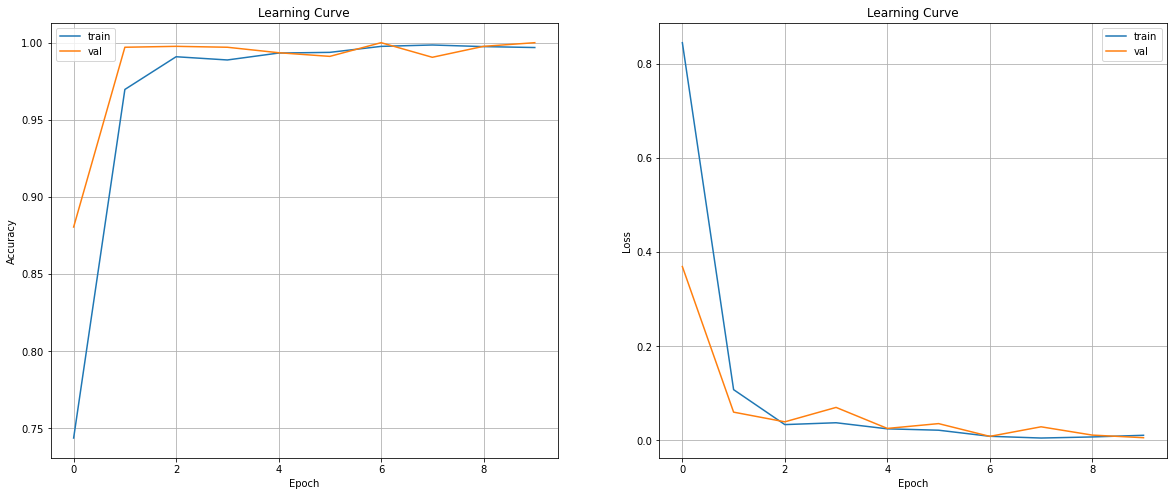

In [43]:
### Visualize learning curve
draw_learning_curve(history2)

In [44]:
train_loss2, train_acc2 = model2.evaluate(x_train, y_train)
Model2 = "Model 2 with data augmentation"
row2 = [Model2, elapsed_time2, train_loss2, train_acc2, final_loss2, final_acc2]
results = results.append(pd.DataFrame([row2], columns=results.columns), ignore_index=True)

212/212 [==============================] - 8s 39ms/step - loss: 0.0061 - accuracy: 1.0000


In [45]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,Model 1 without data augmentation,0 days 00:05:28.005410,0.000846,1.0,0.000948,1.0
1,Model 2 with data augmentation,0 days 00:06:15.431121,0.006108,1.0,0.005798,1.0


## Third model: Resnet50

In [46]:
resnet = keras.applications.ResNet50(weights='imagenet',
                                 include_top=False, input_shape=(100, 100, 3))

In [48]:
#define model
def generateModel3(learning_rate=0.001):
    input_layer = keras.layers.Input(shape = (100, 100, 3))
    
    resnet1=resnet(input_layer)
    glob=GlobalAveragePooling2D()(resnet1)
    
    output = Dense(512)(glob)
    output = Activation("relu")(output)
    output = Dropout(0.25)(output)
    output = Dense(nb_classes, activation='softmax')(output)
    optimizer = keras.optimizers.Adam(learning_rate)
    
    model = keras.Model(inputs = input_layer, outputs = output)
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss="categorical_crossentropy")
    
    return model

In [49]:
model3=generateModel3()
print(model3.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                           

In [50]:
start = timer()
history3 = model3.fit(x_train,y_train, validation_data=(x_val, y_val), epochs=5, 
                    steps_per_epoch=steps_per_epoch,callbacks=early_stopping_cb)
#final validation loss and accuracy
final_loss3, final_acc3 = model3.evaluate(x_val, y_val, verbose=1)
end = timer()
#total time taken by model1
elapsed_time3 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model3".format(final_loss3, final_acc3*100))
print("Model 3 Resnet50 training time in seconds", elapsed_time3)

Epoch 1/5
105/105 [==============================] - 636s 6s/step - loss: 0.2755 - accuracy: 0.9527 - val_loss: 54479.7773 - val_accuracy: 0.0562
Epoch 2/5
105/105 [==============================] - 631s 6s/step - loss: 0.1359 - accuracy: 0.9689 - val_loss: 21.3729 - val_accuracy: 0.0349
Epoch 3/5
105/105 [==============================] - 1865s 18s/step - loss: 0.1283 - accuracy: 0.9737 - val_loss: 36.6429 - val_accuracy: 0.0550
Epoch 4/5
105/105 [==============================] - 601s 6s/step - loss: 0.2152 - accuracy: 0.9577 - val_loss: 36.3647 - val_accuracy: 0.0633
Epoch 5/5
53/53 [==============================] - 31s 579ms/step - loss: 25.2774 - accuracy: 0.0633
Final loss: 25.277416, final accuracy: 6.327616 for model3
Model 3 Resnet50 training time in seconds 0:52:25.119194


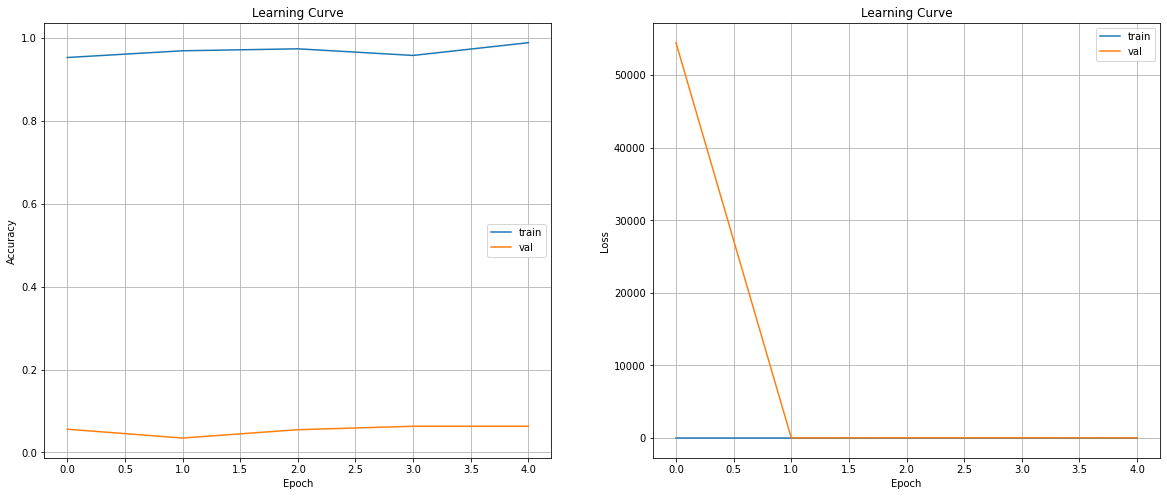

In [51]:
### Visualize learning curve
draw_learning_curve(history3)

In [52]:
train_loss3, train_acc3 = model3.evaluate(x_train, y_train)
Model3 = "Model 3 Resnet 50"
row3 = [Model3, elapsed_time3, train_loss3, train_acc3, final_loss3, final_acc3]
results = results.append(pd.DataFrame([row3], columns=results.columns), ignore_index=True)

212/212 [==============================] - 122s 573ms/step - loss: 25.2576 - accuracy: 0.0631


In [53]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,Model 1 without data augmentation,0 days 00:05:28.005410,0.000846,1.0,0.000948,1.0
1,Model 2 with data augmentation,0 days 00:06:15.431121,0.006108,1.0,0.005798,1.0
2,Model 3 Resnet 50,0 days 00:52:25.119194,25.257587,0.063147,25.277416,0.063276


# 5. Model Evaluation

<AxesSubplot:title={'center':'Model Evaluation'}>

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

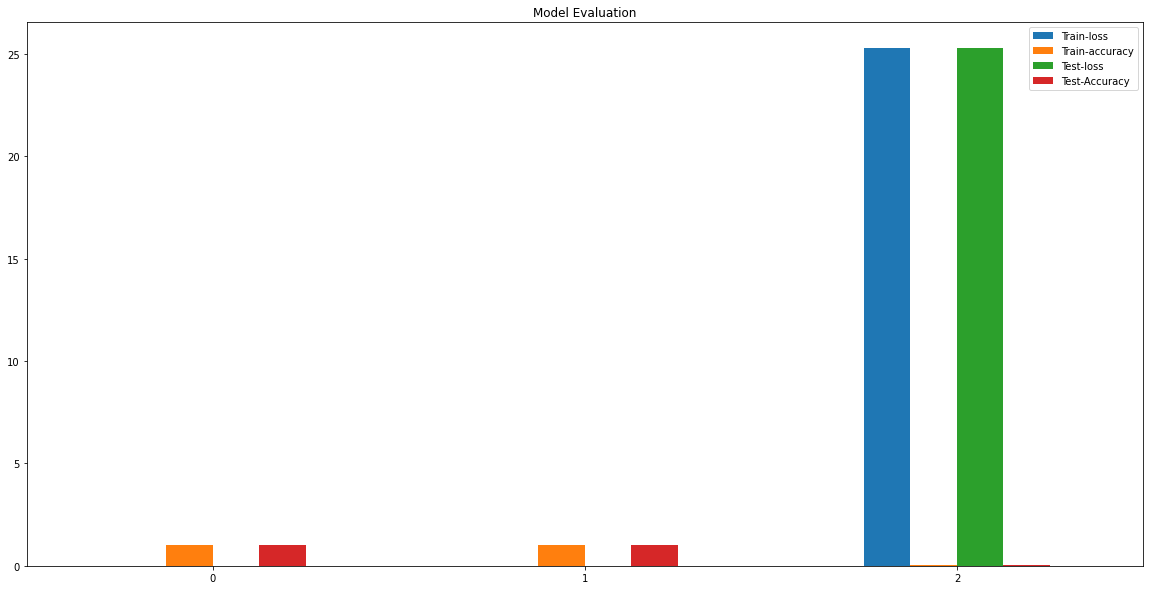

In [60]:
#visualize model results based on test and train loss and accuracy
results[['Train-loss','Train-accuracy', 'Test-loss', 'Test-Accuracy']].plot(kind='bar', title ="Model Evaluation", figsize=(20, 10))
plt.xticks(rotation='horizontal')

Based on the summary table above, Model 3 (Resnet50) underfits the image data with only 0.06 accuracy on both train and validation accuracy. Comparing between model 1 and model 2, they all have very high accuracy of 1.0 for both train and validation set. However, model 1 without data augmentaion has lower train and validation loss than model 2 with data augmentation. Thus, we will pick model 1 as our best model to predict for the test set. We also think data augmentation in case is not necessary. 

In [54]:
y_pred=model1.predict(x_test)

89/89 [==============================] - 4s 46ms/step


In [56]:
y_pred.round(2)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [58]:
prediction=pd.DataFrame(y_pred, columns=fruit)
prediction

,Apple Crimson Snow,Cactus Fruit,Cantaloupe 1,Cherry 1,Eggplant,Fig,Ginger Root,Kiwi,Lychee,Nut Pecan,Pepper Green,Pineapple,Plum,Rambutan,Strawberry,Tomato 1,Watermelon
0,9.999930e-01,2.975697e-10,3.074120e-08,4.213635e-07,6.956879e-10,6.780755e-10,3.557658e-08,1.878369e-06,6.068619e-07,2.150336e-07,5.404319e-09,0.000002,6.973616e-07,6.307999e-11,1.528757e-10,1.569712e-06,1.057379e-09
1,9.999870e-01,6.350991e-10,4.150692e-08,7.162365e-07,1.008714e-09,9.900285e-10,4.518417e-08,3.618289e-06,1.118617e-06,4.935440e-07,5.137369e-09,0.000003,1.326041e-06,1.128443e-10,3.783449e-10,3.007261e-06,1.260749e-09
2,9.999874e-01,8.369795e-10,1.997185e-08,8.029477e-07,1.161136e-09,1.772399e-09,6.535702e-08,2.497991e-06,1.901057e-06,1.391615e-06,5.111391e-09,0.000002,3.263913e-06,1.557598e-10,1.153096e-09,1.159257e-06,2.794083e-09
3,9.995800e-01,7.395388e-10,9.372656e-07,9.280639e-06,1.961483e-09,1.808361e-09,1.986853e-07,7.311855e-05,5.262194e-05,6.950549e-07,7.996127e-09,0.000055,7.390482e-06,3.003126e-09,1.035771e-08,2.205811e-04,7.759959e-10
4,9.999845e-01,7.333711e-10,1.469544e-08,1.196478e-06,1.411780e-09,2.044072e-09,8.381106e-08,1.726708e-06,2.064493e-06,2.251459e-06,6.884632e-09,0.000002,4.667984e-06,2.869968e-10,2.035385e-09,1.406651e-06,2.651626e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,2.221844e-08,6.980602e-07,3.482859e-06,1.508561e-06,1.110068e-05,8.575529e-10,3.128792e-07,1.711249e-08,1.099130e-10,4.793940e-10,2.058261e-03,0.000456,7.103986e-09,7.845239e-07,1.262962e-06,7.917953e-09,9.974661e-01
2823,1.831027e-08,1.190287e-06,2.191597e-06,1.238847e-06,7.240320e-06,7.135258e-10,2.103483e-07,9.950852e-09,6.730765e-11,4.884569e-10,1.279421e-03,0.000217,6.731015e-09,3.122417e-07,8.219594e-07,3.533841e-09,9.984905e-01
2824,2.078582e-09,2.314995e-08,6.604612e-07,2.144683e-08,4.057697e-06,3.064728e-10,1.556129e-06,1.699303e-09,1.611152e-10,2.366865e-10,3.261910e-04,0.000011,3.956902e-10,7.410505e-07,2.811530e-07,4.319577e-10,9.996558e-01
2825,5.104810e-10,7.895447e-08,5.441072e-07,2.133576e-08,2.555554e-06,4.474954e-10,1.913069e-06,1.050043e-09,1.057792e-10,3.147959e-10,1.953001e-04,0.000016,3.075023e-11,5.269400e-07,2.460929e-07,7.738608e-10,9.997830e-01


In [61]:
test_loss, test_acc = model1.evaluate(x_test,y_test)
print('Test loss: {}%'.format(test_loss * 100))
print('Test accuracy: {}%'.format(test_acc * 100))

89/89 [==============================] - 4s 41ms/step - loss: 0.0262 - accuracy: 0.9912
Test loss: 2.6223786175251007%
Test accuracy: 99.11566972732544%


In [63]:
y_pred_class=np.argmax(y_pred,axis=1)
y_test_class=np.argmax(y_test,axis=1)

<AxesSubplot:>

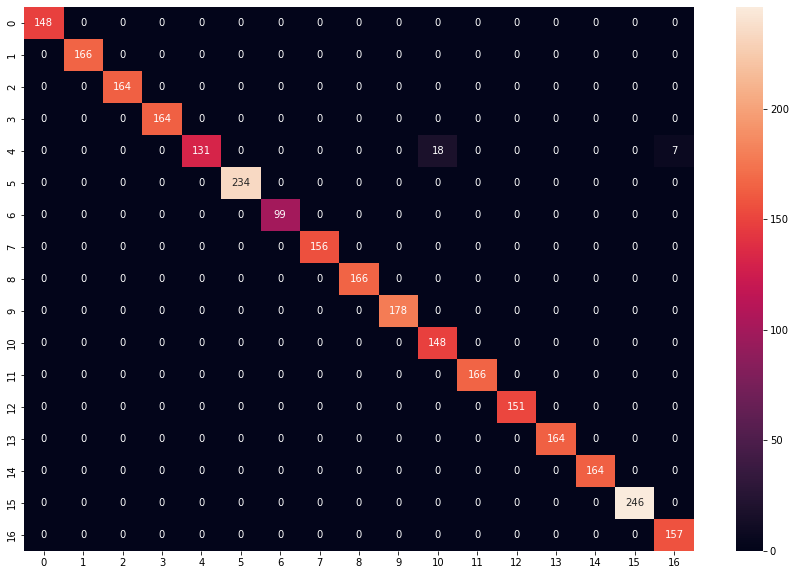

In [82]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test_class,y_pred_class),annot=True,fmt='.0f')

In [85]:
print(fruit[4])
print(fruit[10])
print(fruit[16])

Eggplant
Pepper Green
Watermelon


# 6. Conclusion

We reach 99.12% accuracy and 2.62% loss on the test set with our model 1 without data augmentation, which is pretty good. Only 25 fruits gets wrongly classified. Specifically, 18 green pepper gets predicted as eggplant, and 7 of the watermelon gets classified as eggplant. 